# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbookpro15/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro15/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro15/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookpro15/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/p

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")
print(api_key)


262a061a924547119c6c26a7d43f1da7


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin", 
    language="en"

)

btc_headlines
#btc_df = pd.DataFrame.from_dict(btc_headlines["articles"])

#btc_df.head()


{'status': 'ok',
 'totalResults': 7905,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
   'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
   'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
   'publishedAt': '2021-11-05T13:32:14Z',
   'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum", 
    language="en"

)

eth_headlines
#eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])

#eth_df.head()

{'status': 'ok',
 'totalResults': 2704,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
   'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
   'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
   'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
   'publishedAt': '2021-10-16T18:50:00Z',
   'content': 'A new cross-chain bridge is currently connected 

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments=[]

for articles in btc_headlines["articles"]:
    try: 
        text=articles["content"]
        results=analyzer.polarity_scores(text)
        compound=results["compound"]
        pos=results["pos"]
        neu=results["neu"]
        neg=results["neg"]
        
        sentiments.append({
            "text":text,
            "compound":compound,
            "positive":pos,
            "neutral":neu,
            "negative":neg,
            
        }) 
    except AttributeError:
        pass

btc=pd.DataFrame(sentiments)

btc.head()
        

,text,compound,positive,neutral,negative
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.937,0.063
1,"Specifically, why did someone make a massive p...",0.5461,0.121,0.879,0.000
2,Theres a big new presence slurping up power fr...,0.3612,0.096,0.904,0.000
3,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.901,0.000
4,"For all the talk of democratizing finance, the...",0.0000,0.000,1.000,0.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments=[]

for articles in eth_headlines["articles"]:
    try: 
        text=articles["content"]
        results=analyzer.polarity_scores(text)
        compound=results["compound"]
        pos=results["pos"]
        neu=results["neu"]
        neg=results["neg"]
        
        sentiments.append({
            "text":text,
            "compound":compound,
            "positive":pos,
            "neutral":neu,
            "negative":neg,
            
        }) 
    except AttributeError:
        pass

eth=pd.DataFrame(sentiments)

eth.head()
        

,text,compound,positive,neutral,negative
0,A new cross-chain bridge is currently connecte...,0.0000,0.000,1.000,0.0
1,Mark Cuban has some advice for people who are ...,0.0000,0.000,1.000,0.0
2,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.906,0.0
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.907,0.0
4,Cryptocurrency and business continuity line im...,0.4588,0.097,0.903,0.0


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.228530,0.059250,0.937600,0.003150
std,0.284345,0.065847,0.064354,0.014087
min,-0.273200,0.000000,0.801000,0.000000
25%,0.000000,0.000000,0.893750,0.000000
50%,0.148000,0.032000,0.936500,0.000000
75%,0.485175,0.106250,1.000000,0.000000
max,0.755800,0.199000,1.000000,0.063000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.205080,0.048550,0.944700,0.006750
std,0.298922,0.066368,0.075454,0.021718
min,-0.025800,0.000000,0.792000,0.000000
25%,0.000000,0.000000,0.902500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.475775,0.094750,1.000000,0.000000
max,0.822500,0.208000,1.000000,0.087000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl=WordNetLemmatizer()

# Create a list of stopwords
stop=stopwords.words("english")

# Expand the default stopwords list if necessary
stop.append("...")

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    
    #create a list of words
    words=word_tokenize(text)
    #remove punctuation from text
    words = [word for word in words if word not in punctuation]
    #convert words to lowercase
    words = [word.lower() for word in words]
    #remove stopwords
    words = [word for word in words if word not in stop]
    #lemmatise
    tokens=[wnl.lemmatize(word) for word in words]
    
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc["tokens"]=btc["text"].apply(tokenizer)
btc.head()

,text,compound,positive,neutral,negative,tokens
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.937,0.063,"[similar, hoax, earlier, year, tied, walmart, ..."
1,"Specifically, why did someone make a massive p...",0.5461,0.121,0.879,0.000,"[specifically, someone, make, massive, purchas..."
2,Theres a big new presence slurping up power fr...,0.3612,0.096,0.904,0.000,"[there, big, new, presence, slurping, power, u..."
3,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.901,0.000,"[last, week, wall, street, journal, ran, piece..."
4,"For all the talk of democratizing finance, the...",0.0000,0.000,1.000,0.000,"[talk, democratizing, finance, vast, majority,..."


In [14]:
# Create a new tokens column for Ethereum
eth["tokens"]=eth["text"].apply(tokenizer)
eth.head()

,text,compound,positive,neutral,negative,tokens
0,A new cross-chain bridge is currently connecte...,0.0000,0.000,1.000,0.0,"[new, cross-chain, bridge, currently, connecte..."
1,Mark Cuban has some advice for people who are ...,0.0000,0.000,1.000,0.0,"[mark, cuban, advice, people, new, investing, ..."
2,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.906,0.0,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.907,0.0,"[elon, musk, picture, alliance, getty, image, ..."
4,Cryptocurrency and business continuity line im...,0.4588,0.097,0.903,0.0,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N=2
grams=ngrams(tokenizer(btc["text"].str.cat()),N)
Counter(grams).most_common(20)

[(('reuters', 'bitcoin'), 5),
 (('char', 'representation'), 4),
 (('cryptocurrency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('bitcoin', 'seen'), 4),
 (('security', 'exchange'), 4),
 (('exchange', 'commission'), 4),
 (('exchange-traded', 'fund'), 4),
 (('representation', 'virtual'), 3),
 (('virtual', 'cryptocurrency'), 3),
 (('seen', 'picture'), 3),
 (('picture', 'illustration'), 3),
 (('taken', 'october'), 3),
 (('2021', 'reuters/edgar'), 3),
 (('char', 'bitcoin'), 3),
 (('kong', 'oct'), 2),
 (('october', '19'), 2),
 (('19', '2021'), 2),
 (('oct', '20'), 2),
 (('20', 'reuters'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
N=2
grams=ngrams(tokenizer(eth["text"].str.cat()),N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 4),
 (('elon', 'musk'), 3),
 (('getty', 'image'), 3),
 (('char', 'representation'), 3),
 (('representation', 'cryptocurrencies'), 3),
 (('ethereum', 'dogecoin'), 3),
 (('illustration', 'taken'), 3),
 (('taken', 'june'), 3),
 (('rahul', 'rai'), 3),
 (('cross-chain', 'bridge'), 2),
 (('char', 'elon'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('cryptocurrencies', 'bitcoin'), 2),
 (('dogecoin', 'ripple'), 2),
 (('ripple', 'litecoin'), 2),
 (('litecoin', 'placed'), 2),
 (('placed', 'pc'), 2),
 (('pc', 'motherboard'), 2),
 (('motherboard', 'illustration'), 2),
 (('june', '29'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(btc["text"].str.cat()),N=10)

[('bitcoin', 24),
 ('char', 19),
 ('reuters', 6),
 ('etf', 6),
 ('may', 5),
 ('commission', 5),
 ('illustration', 5),
 ('new', 5),
 ('taken', 5),
 ('2021', 5)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth["text"].str.cat()),N=10)

[('char', 20),
 ('ethereum', 12),
 ('bitcoin', 9),
 ('cryptocurrency', 8),
 ('…', 6),
 ('image', 6),
 ('cryptocurrencies', 4),
 ('2021', 4),
 ('representation', 4),
 ('market', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

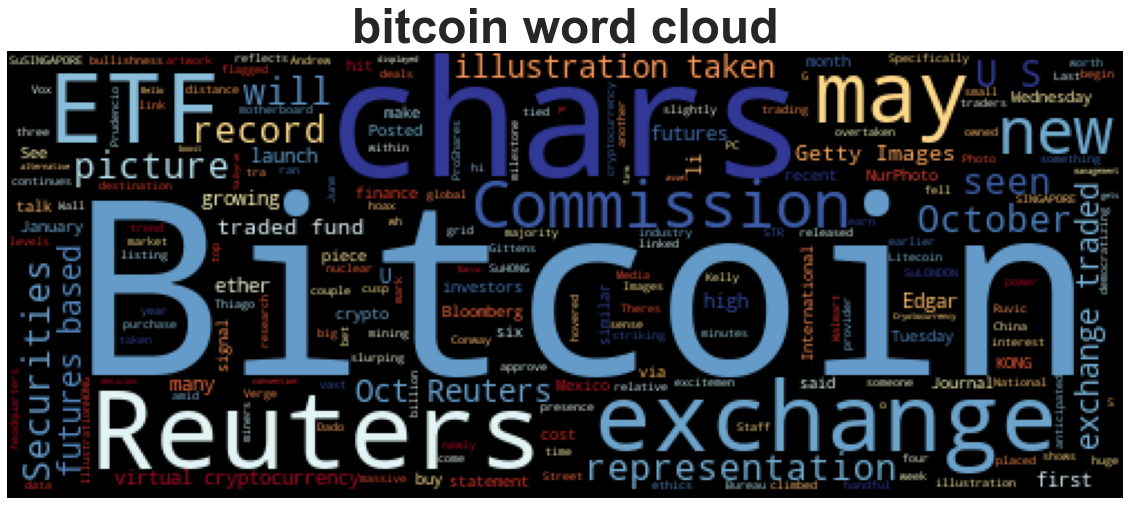

In [22]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(btc["text"].str.cat(),title="bitcoin word cloud")

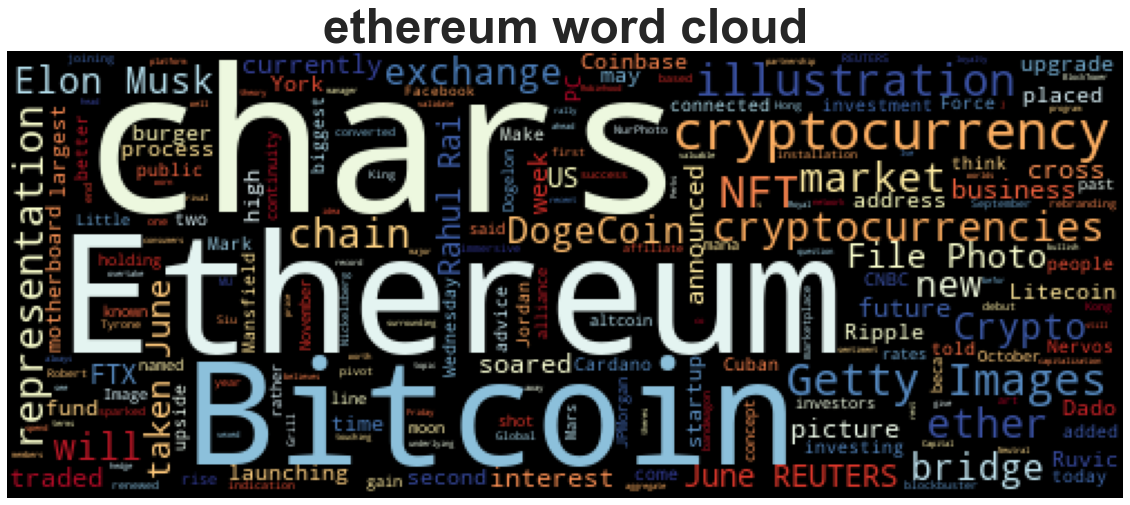

In [23]:
# Generate the Ethereum word cloud
wordcloud(eth["text"].str.cat(),title="ethereum word cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 840 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_text=btc["text"].str.cat()

In [28]:
# Run the NER processor on all of the text
doc=nlp(btc_text)

# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(doc,style="ent",jupyter=True)

In [30]:
# List all Entities
for ent in doc.ents:
    print(ent.text,ent.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Reuters ORG
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares PERSON
2021 DATE
Marco Bello PERSON
The Securities and Exchange

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text=eth["text"].str.cat()

In [32]:
# Run the NER processor on all of the text
doc=nlp(eth_text)

# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [33]:
# Render the visualization
displacy.render(doc,style="ent",jupyter=True)

In [34]:
# List all Entities
for ent in doc.ents:
    print(ent.text,ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Cuban NORP
CNBC ORG
Wednesday DATE
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
Ethereum GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Rahul Rai PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
Thursday DATE
6:13 p.m. TIME
New York GPE
Ethereum PERSON
CryptoPunk ORG
0x8e39 CARDINAL
NFT ORG
Lionsgate/Miramax ORG
Quentin Tarantino's

---